In [1]:
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
from tensorflow.contrib import rnn
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length // batch_size // truncated_backprop_length

In [3]:
def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0
    
    x = x.reshape((batch_size, -1))
    y = y.reshape((batch_size, -1))
    
    return (x, y)

In [4]:
x_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
y_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size, state_size])

W2 = tf.Variable(np.random.rand(state_size, num_classes), dtype=tf.float32)
b2 = tf.Variable(np.zeros((1, num_classes)), dtype=tf.float32)

In [5]:
input_series = tf.split(x_placeholder, truncated_backprop_length, 1)
label_series = tf.unstack(y_placeholder, axis=1)

cell = rnn.BasicRNNCell(state_size)
state_series, current_state = rnn.static_rnn(cell, input_series, init_state)

logit_series = [tf.matmul(state, W2) + b2 for state in state_series]
prediction_series = [tf.nn.softmax(logits) for logits in logit_series]

loss = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels) for logits, labels in zip(logit_series, label_series)]
total_loss = tf.reduce_mean(loss)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

In [6]:
def plot(loss_list, prediction_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(prediction_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)

New data 0
Step 0 Loss 0.692686
Step 100 Loss 0.0096617
Step 200 Loss 0.00514435
Step 300 Loss 0.00281625
Step 400 Loss 0.00237747
Step 500 Loss 0.00180663
Step 600 Loss 0.00147134
New data 1
Step 0 Loss 0.134831
Step 100 Loss 0.00111446
Step 200 Loss 0.00111941
Step 300 Loss 0.00083331
Step 400 Loss 0.000821429
Step 500 Loss 0.000766714
Step 600 Loss 0.000666422
New data 2
Step 0 Loss 0.298237
Step 100 Loss 0.00176218
Step 200 Loss 0.00139891
Step 300 Loss 0.00129052
Step 400 Loss 0.00106614
Step 500 Loss 0.000941458
Step 600 Loss 0.000933247
New data 3
Step 0 Loss 0.20232
Step 100 Loss 0.000888679
Step 200 Loss 0.000723841
Step 300 Loss 0.00074379
Step 400 Loss 0.000672682
Step 500 Loss 0.000683257
Step 600 Loss 0.000575795
New data 4
Step 0 Loss 0.145318
Step 100 Loss 0.000588189
Step 200 Loss 0.000564512
Step 300 Loss 0.00048849
Step 400 Loss 0.000473344
Step 500 Loss 0.000424787
Step 600 Loss 0.000337021
New data 5
Step 0 Loss 0.151616
Step 100 Loss 0.000423081
Step 200 Loss 0.000

Step 500 Loss 5.44002e-05
Step 600 Loss 5.62739e-05
New data 44
Step 0 Loss 0.166741
Step 100 Loss 5.7919e-05
Step 200 Loss 5.15663e-05
Step 300 Loss 5.61724e-05
Step 400 Loss 5.51631e-05
Step 500 Loss 5.30716e-05
Step 600 Loss 4.70209e-05
New data 45
Step 0 Loss 0.165895
Step 100 Loss 5.65293e-05
Step 200 Loss 5.50356e-05
Step 300 Loss 5.44939e-05
Step 400 Loss 4.95749e-05
Step 500 Loss 5.56746e-05
Step 600 Loss 4.77073e-05
New data 46
Step 0 Loss 0.174083
Step 100 Loss 5.97549e-05
Step 200 Loss 4.63295e-05
Step 300 Loss 5.83289e-05
Step 400 Loss 4.81191e-05
Step 500 Loss 5.71828e-05
Step 600 Loss 5.64502e-05
New data 47
Step 0 Loss 0.204643
Step 100 Loss 4.95663e-05
Step 200 Loss 5.07335e-05
Step 300 Loss 4.89248e-05
Step 400 Loss 5.51088e-05
Step 500 Loss 5.26837e-05
Step 600 Loss 5.19999e-05
New data 48
Step 0 Loss 0.199352
Step 100 Loss 5.03916e-05
Step 200 Loss 5.00373e-05
Step 300 Loss 4.60179e-05
Step 400 Loss 5.03281e-05
Step 500 Loss 5.04584e-05
Step 600 Loss 4.53885e-05
New 

Step 200 Loss 3.11097e-05
Step 300 Loss 3.23125e-05
Step 400 Loss 3.26116e-05
Step 500 Loss 3.11286e-05
Step 600 Loss 3.20936e-05
New data 88
Step 0 Loss 0.138011
Step 100 Loss 3.02578e-05
Step 200 Loss 3.04389e-05
Step 300 Loss 3.23812e-05
Step 400 Loss 3.1979e-05
Step 500 Loss 3.08808e-05
Step 600 Loss 3.0474e-05
New data 89
Step 0 Loss 0.169879
Step 100 Loss 3.28183e-05
Step 200 Loss 3.39929e-05
Step 300 Loss 3.0989e-05
Step 400 Loss 3.86015e-05
Step 500 Loss 2.80565e-05
Step 600 Loss 3.13815e-05
New data 90
Step 0 Loss 0.31341
Step 100 Loss 3.08141e-05
Step 200 Loss 3.44141e-05
Step 300 Loss 3.07474e-05
Step 400 Loss 3.45079e-05
Step 500 Loss 3.43808e-05
Step 600 Loss 3.06616e-05
New data 91
Step 0 Loss 0.172001
Step 100 Loss 3.46144e-05
Step 200 Loss 2.87114e-05
Step 300 Loss 2.81202e-05
Step 400 Loss 3.39374e-05
Step 500 Loss 3.00799e-05
Step 600 Loss 3.35447e-05
New data 92
Step 0 Loss 0.210925
Step 100 Loss 2.93328e-05
Step 200 Loss 2.90228e-05
Step 300 Loss 3.17186e-05
Step 40

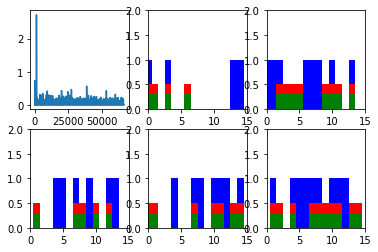

In [7]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []
    
    for epoch_idx in range(num_epochs):
        x, y = generateData()
        _current_state = np.zeros((batch_size, state_size))
        
        print ('New data', epoch_idx)
        
        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length
            
            batchX = x[:, start_idx: end_idx]
            batchY = y[:, start_idx: end_idx]
            
            _total_loss, _train_step, _current_state, _prediction_series = sess.run(
            [total_loss, train_step, current_state, prediction_series],
            feed_dict = {
                x_placeholder: batchX,
                y_placeholder: batchY,
                init_state: _current_state
            })
            
            loss_list.append(_total_loss)
            
            if batch_idx % 100 ==0:
                print('Step', batch_idx, 'Loss', _total_loss)
                plot(loss_list, _prediction_series, batchX, batchY)
                
plt.ioff()
plt.show()